In [1]:
import numpy as np
from typing import Tuple, TextIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *

In [2]:
# Convenience Constant

PROVINCE_CODES = (
        ('10','NL'),
        ('11','PE'),
        ('12','NS'),
        ('13','NB'),
        ('24','QC'),
        ('35','ON'),
        ('46','MB'),
        ('47','SK'),
        ('48','AB'),
        ('59','BC'),
        ('60','NN') # NN is a combined code for NT, NU and YK
    )

# PART 1: PREPARATION

# Change data types to:
# - 'U2' for nominal
# - int for ordinal
# - float for interval
# - float for ratio

DATA_COLUMNS = [
('alcofreq', int),
('alcoweek', float),
('biosex', 'U2'),
('agegroup', int),
('education', int),
('fruitvegtot', float),
('stressgen', int),
('stresswork', int),
('healthphys', int),
('healthment', int),
('satisfaction', int),
('province', 'U2'),
('hasdoctor', 'U2'),
('bmi', float),
('height', float),
('weight', float),
('incomegroup', int),
('workhoursperweek', float),
('firstlanguage', 'U2'),
('yrsmokedaily', float)
]


# Fill out tuples with nominal, ordinal, interval, and ratio column names

NOMINAL = ('biosex',
           'province',
           'hasdoctor',
           'firstlanguage')
ORDINAL = ('alcofreq',
           'agegroup',
           'education',
           'stressgen',
           'stresswork',
           'healthphys',
           'healthment',
           'satisfaction',
           'incomegroup')
           
INTERVAL = ()

RATIO = ('alcoweek',
         'fruitvegtot',
         'bmi',
         'height',
         'weight',
         'workhoursperweek',
         'yrsmokedaily')



In [3]:
# PART 2: FUNCTIONS

def replace_nominal_codes(data: np.array, column_name: str, codes: Tuple[Tuple[str, str]]) -> None:
    '''Precondition: column_name exists in data and is a nominal data measurement scale.
    codes is a tuple of tuples containing (old code, new code).

    Change all occurrences of old code to new code in column_name of data.
    
    >>> replace_nominal_codes(CCHS, 'biosex', (('1', 'M'),('2', 'F')))
    >>> CCHS['biosex'][0]
    'F'
    >>> CCHS['biosex'][-1]
    'M'
    '''
    for subtuple in codes:
        data[column_name][data[column_name]==subtuple[0]] = subtuple[1]
        
def replace_missing_with_nan(data: np.array, column_name: str, missing_codes: Tuple[float]) -> None:
    '''Precondition: column_name exists in data and is a ratio data measurement scale.
    missing_codes is a tuple containing codes that denote missing data.
    Convert all values in column column_name of data that match the codes 
    in missing_codes to Not-A-Number values (np.nan)
    
    >>> replace_missing_with_nan(CCHS, 'alcoweek', (996,))
    >>> CCHS['alcoweek'][2]
    nan
    >>> CCHS['alcoweek'][-3]
    nan
    '''
    
    for code in missing_codes:
        data[column_name][data[column_name] == code] = 'nan'
        
def write_categorical_csv(data: np.array, column_name: str, outfile: TextIO) -> None:
    '''Precondition: column_name exists in data and is nominal or ordinal data measurement scale.
    Write to outfile the label and counts of each category contained in column_name of data.
    
    >>> with open("csv/biosex.csv", 'w') as file:
            write_categorical_csv(CCHS, 'biosex', file)
    >>> with open("csv/biosex.csv", 'r') as check:
            for line in check:
                print(line.strip())
    biosex,count
    F,832
    M,668
    '''
    
    count_unique_val = np.unique(data[column_name], return_counts=True)
    outfile.write(column_name + ',count\n')
    for i in range(len(count_unique_val[0])):
        outfile.write(str(count_unique_val[0][i]) + ',' + str(count_unique_val[1][i]) + '\n')


def write_column_summary_csv(data: np.array, column_name: str, outfile: TextIO) -> None:
    '''Precondition: column_name exists in data and is a non-nominal data measurement scale.
    Write to outfile a line containing comma-separated values as follows:
    - The column name
    - The median of values in the column
    - (if interval or ratio) The mean of values in the column, ignoring nan
    - (if interval or ratio) The standard deviation of values in the column, ignoring nan
    
    (Examples not required)
    
    '''
    median = str(round(np.nanmedian(data[column_name]), 2))
    if str(data[column_name].dtype).startswith("int"):
        outfile.write(column_name + "," + median + ",," +'\n')
    if str(data[column_name].dtype).startswith("float"):
        mean = str(round(np.nanmean(data[column_name]), 2))
        stdev = str(round(np.nanstd(data[column_name]),2))
        outfile.write(column_name + "," + median + ',' + mean + ',' + stdev +'\n')
            


In [4]:
if __name__ == "__main__":
    
    # Uncomment when Part 1 is complete
    CCHS = np.genfromtxt('CCHSX.csv', delimiter=',', skip_header=1, dtype=DATA_COLUMNS)
    
    # Uncomment when replace_nominal_codes is complete
    replace_nominal_codes(CCHS, 'biosex', (('1','M'),('2','F')))
    replace_nominal_codes(CCHS, 'province', PROVINCE_CODES)
    replace_nominal_codes(CCHS, 'hasdoctor', (('1','Y'),('2','N')))
    replace_nominal_codes(CCHS, 'firstlanguage', (('1','EN'),('2','FR'),('3','EF'),('4','NO')))

    # Uncomment when replace_missing_with_nan is complete
    replace_missing_with_nan(CCHS, 'alcoweek', (996,))
    replace_missing_with_nan(CCHS, 'fruitvegtot', (996,))
    replace_missing_with_nan(CCHS, 'bmi', (996,))
    replace_missing_with_nan(CCHS, 'height', (996,))
    replace_missing_with_nan(CCHS, 'weight', (996,))
    replace_missing_with_nan(CCHS, 'workhoursperweek', (996,))
    replace_missing_with_nan(CCHS, 'yrsmokedaily', (996,))
    
    # Uncomment when write_categorical_csv is complete
    for c in NOMINAL + ORDINAL:
        with open("csv/"+c+'.csv', 'w') as f:
            write_categorical_csv(CCHS, c, f)
    
    # Uncomment when ordinal_column_csv is complete
    with open("csv/summary.csv", 'w') as f:
        f.write("COLUMN,MEDIAN,MEAN,STDEV\n")
        for n in ORDINAL + INTERVAL + RATIO:
            write_column_summary_csv(CCHS, n, f)

# Understanding the variables through visualization

We group all nominal data

In [5]:
CCHS = np.genfromtxt('CCHSX.csv', delimiter=',', skip_header=1, dtype=DATA_COLUMNS)

In [6]:
CCHS

array([(2,   0., '2', 16, 4, 2.5, 2, 0, 2, 3, 2, '35', '1', 19.7 , 1.473, 42.75, 2, 996., '1', 6.),
       (8,   7., '1', 14, 4, 4. , 1, 0, 4, 4, 1, '24', '1', 28.47, 1.778, 90.  , 5, 996., '2', 5.),
       (6, 996., '1',  6, 2, 3.3, 1, 1, 4, 4, 2, '48', '2', 27.05, 1.778, 85.5 , 5,  80., '1', 1.),
       ...,
       (5, 996., '2',  4, 2, 4.2, 3, 5, 4, 3, 2, '11', '2', 20.34, 1.524, 47.25, 5, 996., '1', 6.),
       (8,   8., '2', 11, 4, 6.8, 3, 3, 4, 4, 1, '35', '1', 23.04, 1.575, 57.15, 5,  55., '1', 6.),
       (4,   2., '1',  3, 2, 4.3, 2, 2, 2, 3, 1, '35', '1', 29.07, 1.803, 94.5 , 3,  50., '1', 1.)],
      dtype=[('alcofreq', '<i4'), ('alcoweek', '<f8'), ('biosex', '<U2'), ('agegroup', '<i4'), ('education', '<i4'), ('fruitvegtot', '<f8'), ('stressgen', '<i4'), ('stresswork', '<i4'), ('healthphys', '<i4'), ('healthment', '<i4'), ('satisfaction', '<i4'), ('province', '<U2'), ('hasdoctor', '<U2'), ('bmi', '<f8'), ('height', '<f8'), ('weight', '<f8'), ('incomegroup', '<i4'), ('workhou

explain the step and what is canvas, figure and subplot

(4, 2)
file:  [['EF' '14']
 ['EN' '1187']
 ['FR' '293']
 ['NO' '6']]


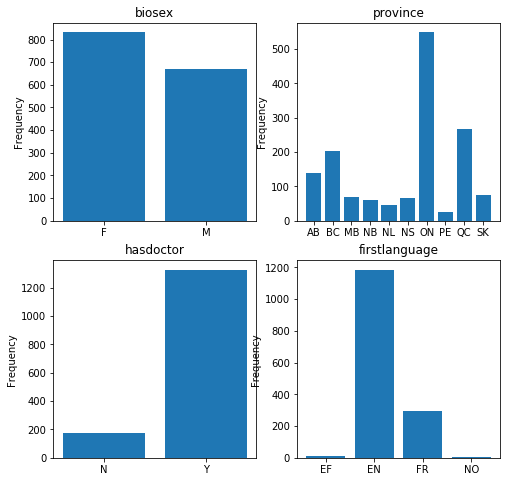

In [7]:
#Defining the canvas shape and figures sizes
plots_size = (8,8)
plt.figure(1, figsize=plots_size)
#------------------
#First we need the number of nominal variables
rows = 221
counter_num_subplots = 0 
subplot_position = 0
count = np.asarray(DATA_COLUMNS)
print(count[count[:,1] == 'U2'].shape)
for i in range(len(DATA_COLUMNS)):
    if DATA_COLUMNS[i][1] == 'U2':
        with open("csv/" + DATA_COLUMNS[i][0] + ".csv") as file:
            subplot_file = np.genfromtxt(file, delimiter=',', skip_header=1, dtype='U16')
        plot_bar = plt.subplot(counter_num_subplots+ subplot_position+rows) #111
        plot_bar.bar(subplot_file[:,0], subplot_file[:,1].astype('float64'), label='PSS')
        plot_bar.set_title(DATA_COLUMNS[i][0])
        #plot_bar.set_xlabel('label')
        plot_bar.set_ylabel('Frequency')
        rows += 1
        
print('file: ', subplot_file)





#------------------
plt.show()

We group all ordinal data

array([['1', '147'],
       ['2', '315'],
       ['3', '301'],
       ['4', '236'],
       ['5', '501']], dtype='<U16')

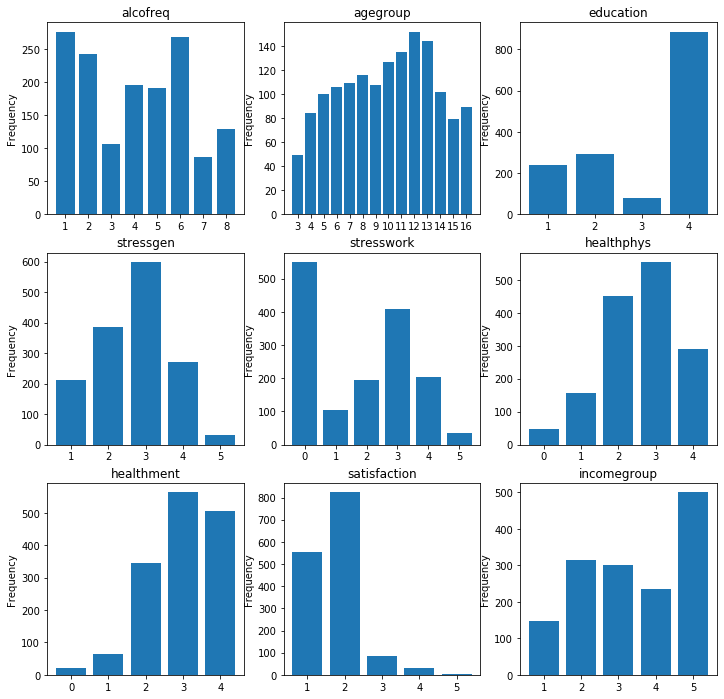

In [8]:
#Defining the canvas shape and figures sizes
data_array = np.asarray(DATA_COLUMNS)
plot_shape = count[count[:,1] == int].shape
#plot_shape_odd = 
#plot_shape_even
plots_size = (12,12)
plt.figure(1, figsize=plots_size)
#------------------
#First we need the number of nominal variables
rows = 331
counter_num_subplots = 0 
subplot_position = 0
for i in range(len(DATA_COLUMNS)):
    if DATA_COLUMNS[i][1] == int:
        with open("csv/" + DATA_COLUMNS[i][0] + ".csv") as file:
            subplot_file = np.genfromtxt(file, delimiter=',', skip_header=1, dtype='U16')
        plot_bar = plt.subplot(counter_num_subplots+ subplot_position+rows) #111
        plot_bar.bar(subplot_file[:,0], subplot_file[:,1].astype('float64'), label='PSS')
        plot_bar.set_title(DATA_COLUMNS[i][0])
        #plot_bar.set_xlabel('label')
        plot_bar.set_ylabel('Frequency')
        rows += 1

subplot_file

#------------------
#plt.show()

numerical

In [9]:
CCHS

#------------------
#plt.show()

array([(2,   0., '2', 16, 4, 2.5, 2, 0, 2, 3, 2, '35', '1', 19.7 , 1.473, 42.75, 2, 996., '1', 6.),
       (8,   7., '1', 14, 4, 4. , 1, 0, 4, 4, 1, '24', '1', 28.47, 1.778, 90.  , 5, 996., '2', 5.),
       (6, 996., '1',  6, 2, 3.3, 1, 1, 4, 4, 2, '48', '2', 27.05, 1.778, 85.5 , 5,  80., '1', 1.),
       ...,
       (5, 996., '2',  4, 2, 4.2, 3, 5, 4, 3, 2, '11', '2', 20.34, 1.524, 47.25, 5, 996., '1', 6.),
       (8,   8., '2', 11, 4, 6.8, 3, 3, 4, 4, 1, '35', '1', 23.04, 1.575, 57.15, 5,  55., '1', 6.),
       (4,   2., '1',  3, 2, 4.3, 2, 2, 2, 3, 1, '35', '1', 29.07, 1.803, 94.5 , 3,  50., '1', 1.)],
      dtype=[('alcofreq', '<i4'), ('alcoweek', '<f8'), ('biosex', '<U2'), ('agegroup', '<i4'), ('education', '<i4'), ('fruitvegtot', '<f8'), ('stressgen', '<i4'), ('stresswork', '<i4'), ('healthphys', '<i4'), ('healthment', '<i4'), ('satisfaction', '<i4'), ('province', '<U2'), ('hasdoctor', '<U2'), ('bmi', '<f8'), ('height', '<f8'), ('weight', '<f8'), ('incomegroup', '<i4'), ('workhou

1. Data cleaning 
2. Plot the ratio values

array([['1', '147'],
       ['2', '315'],
       ['3', '301'],
       ['4', '236'],
       ['5', '501']], dtype='<U16')

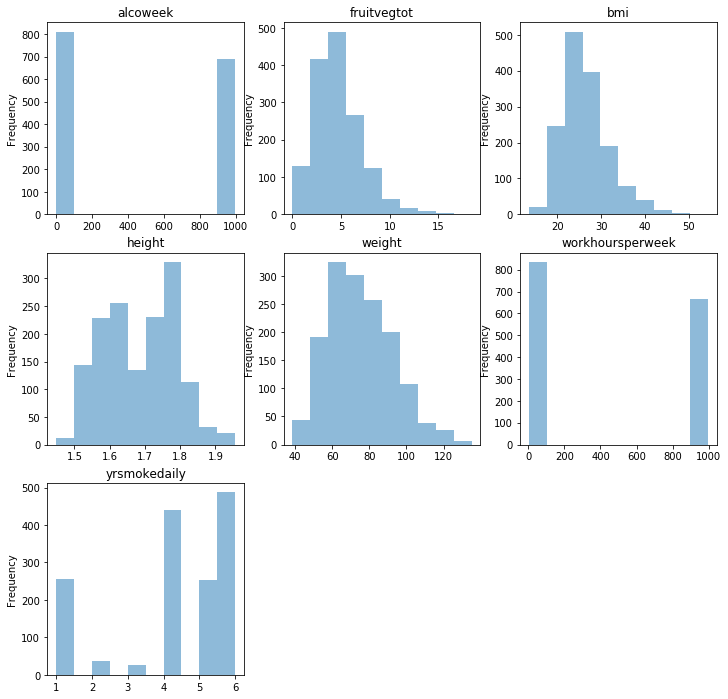

In [10]:
#Defining the canvas shape and figures sizes
data_array = np.asarray(DATA_COLUMNS)
plot_shape = count[count[:,1] == float].shape
#plot_shape_odd
#plot_shape_even
plots_size = (12,12)
plt.figure(1, figsize=plots_size)
#------------------
#First we need the number of nominal variables
rows = 331
counter_num_subplots = 0 
subplot_position = 0
for i in range(len(DATA_COLUMNS)):
    if DATA_COLUMNS[i][1] == float:
        subplot = CCHS[DATA_COLUMNS[i][0]]
        plot_hist = plt.subplot(counter_num_subplots+ subplot_position+rows) #111
        plot_hist.hist(subplot, bins=10, alpha=0.5, label='PSS')
        plot_hist.set_title(DATA_COLUMNS[i][0])
        #plot_bar.set_xlabel('label')
        plot_hist.set_ylabel('Frequency')
        rows += 1

subplot_file

In [11]:
df = pd.DataFrame(data=CCHS)

In [12]:
corr = df.corr()

In [13]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
max_corr = corr[corr != mask].max().max()

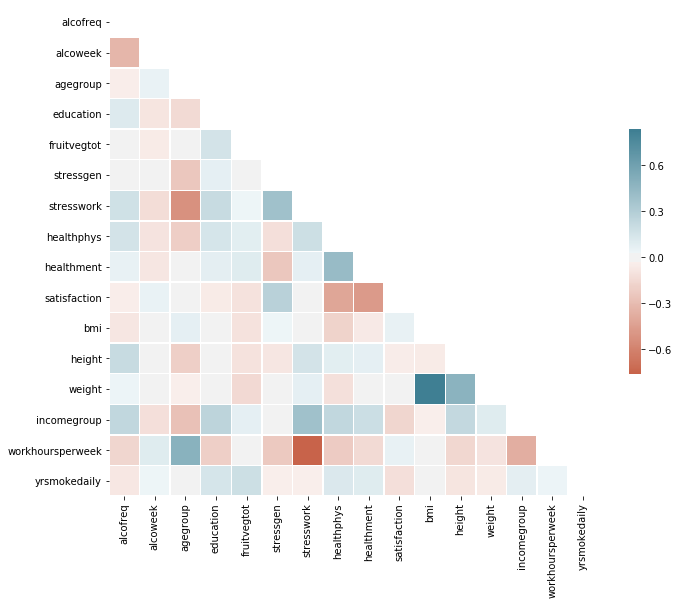

In [14]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=max_corr, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) 

In [16]:
CCHS['alcoweek']

array([  0.,   7., 996., ..., 996.,   8.,   2.])

TypeError: hist() got multiple values for argument 'bins'

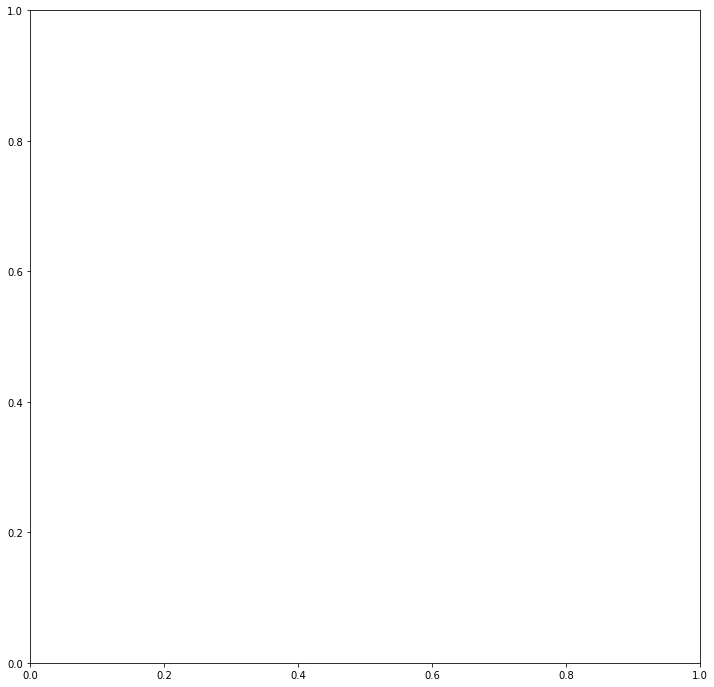

In [24]:
plots_size = (12,12)
plt.figure(1, figsize=plots_size)
plot_hist = plt.subplot(111) #111
plot_hist.hist(CCHS['alcofreq'], CCHS['alcoweek'],  bins=2, alpha=0.5, label='PSS')
plot_hist.set_title(DATA_COLUMNS[i][0])
plot_bar.set_xlabel('label')
plot_hist.set_ylabel('Frequency')